In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

In [50]:
firms = ["GOOG","TSLA","YHOO","FB","AAPL","MSFT","AMZN"]

In [51]:
end = datetime.now()

start = datetime(end.year-3,end.month,end.day)

In [52]:
for each_firm in firms:
    globals()[each_firm] = DataReader(each_firm,"yahoo",start,end)

In [53]:
TSLA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,187.327298,190.681483,183.820265,187.344623,6575785.695364,187.344623
std,67.677493,68.365748,66.821363,67.613704,4932173.668895,67.613704
min,33.080002,33.380001,32.110001,32.910000,440200.000000,32.910000
25%,149.650002,152.839996,146.450005,149.570000,3435550.000000,149.570000
50%,208.570007,212.440002,204.960007,207.830002,5307700.000000,207.830002
75%,236.550003,241.500000,232.214997,237.205001,8234800.000000,237.205001
max,287.670013,291.420013,280.399994,286.040009,37163900.000000,286.040009


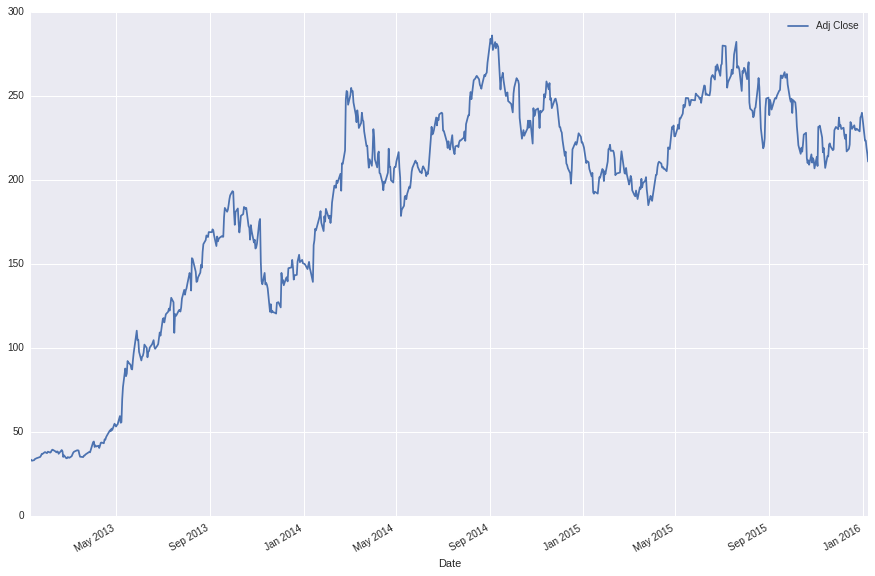

In [21]:
TSLA["Adj Close"].plot(legend = True, figsize = (15,10)) 

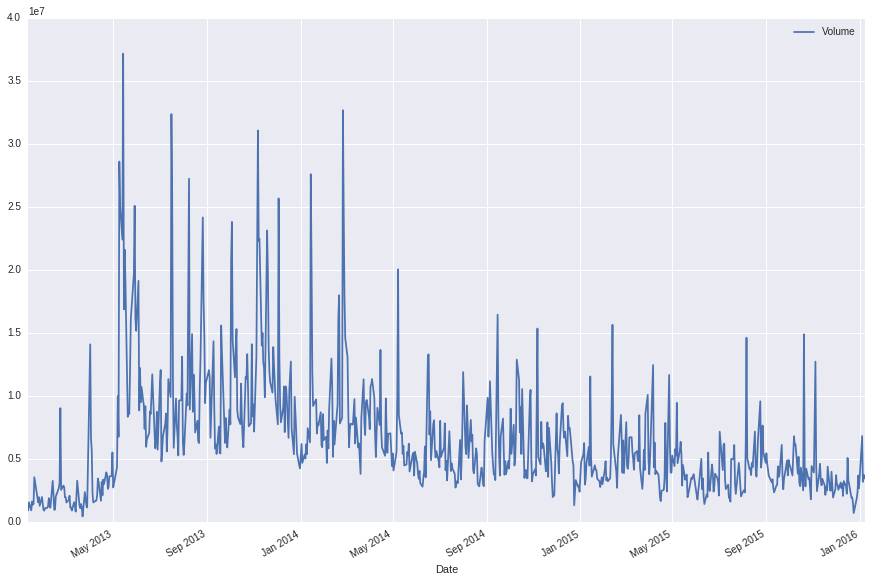

In [23]:
TSLA["Volume"].plot(legend = True, figsize = (15,10))

In [55]:
day_list = [30,90,180]

for day in day_list:
    col_name = "M.avg for %s days" %(str(day))
    TSLA[col_name] = pd.rolling_mean(TSLA["Adj Close"],day)  
   

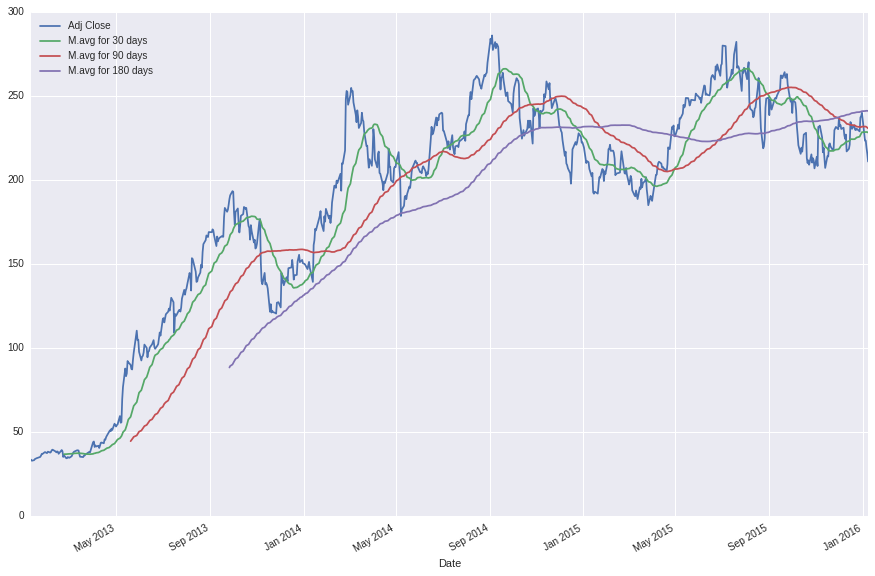

In [58]:
TSLA[["Adj Close", "M.avg for 30 days","M.avg for 90 days","M.avg for 180 days"]].plot(legend = True, figsize = (15,10))

In [60]:
TSLA["Daily Return"]=TSLA["Adj Close"].pct_change()

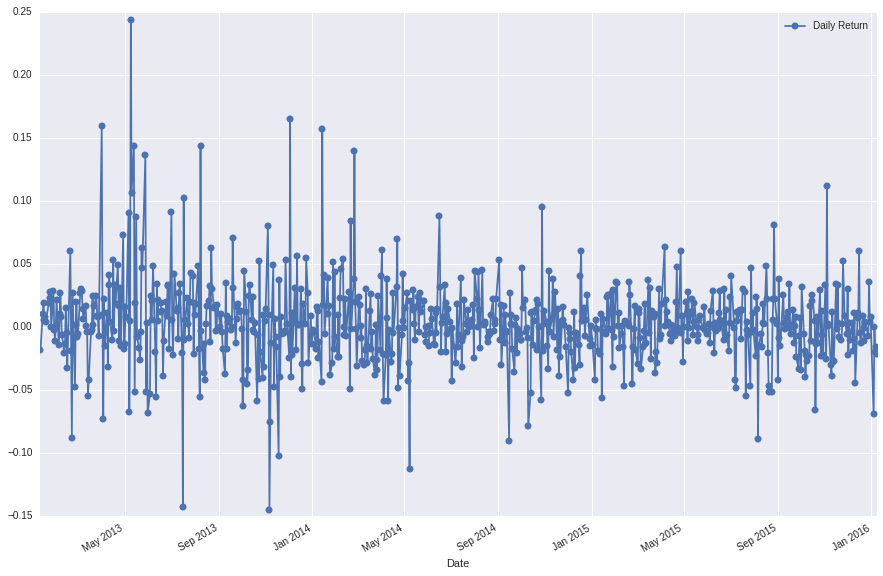

In [67]:
TSLA["Daily Return"].plot(legend = True, 
                          figsize = (15,10),
                         linestyle = "-",
                         marker="o")

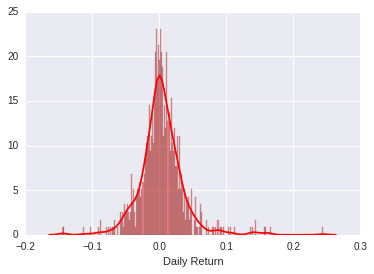

In [77]:
sns.distplot(TSLA["Daily Return"].dropna(), bins = 250, color ="red")

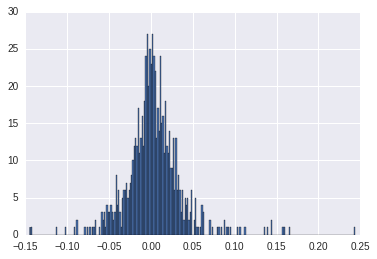

In [78]:
TSLA["Daily Return"].hist(bins = 250)

In [81]:
closing_stock_df = DataReader(firms,"yahoo", start,end)

In [105]:
daily_return = closing_stock_df["Adj Close"].pct_change()

In [106]:
daily_return.head()

,AAPL,AMZN,FB,GOOG,MSFT,TSLA,YHOO
Date,,,,,,,
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-11,-0.006132,0.009799,0.013419,NaN,0.013983,-0.018491,0.015798
2013-01-14,-0.035653,0.017877,-0.024275,NaN,0.002236,0.010635,0.007258
2013-01-15,-0.031550,-0.003043,-0.027464,NaN,0.011900,0.019242,0.004632
2013-01-16,0.041509,-0.010923,-0.008306,NaN,-0.006248,0.005900,0.028176


/home/aamir/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


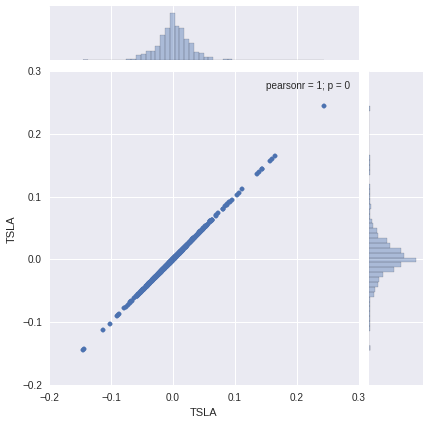

In [107]:
sns.jointplot("TSLA","TSLA",daily_return)

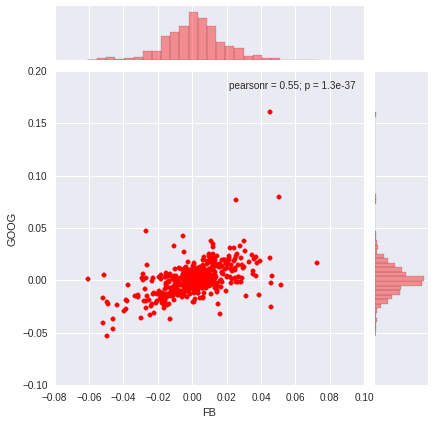

In [108]:
sns.jointplot("FB","GOOG",daily_return,color = "red")